# Analysis of Home Sales

## Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Loading Dataset

In [2]:
df = pd.read_excel('C:/Users/dell/Documents/Home Sales/Home Sales Data.xlsx',
                   sheet_name=['Home Sale Data'])

df = df['Home Sale Data']

In [3]:
df

,Address,City,Region,SquareFootage,Big deals (>5000),Acreage,AskingPrice,SalePrice,SaleDate,Sale Month,Agent,Unnamed: 11,Addres,Unnamed: 13
0,Pearl Street,Louisville,West,1438,0,0.302,2.065195e+05,1.653395e+05,2020-02-09,February,Timothy Case,NaN,NaN,Pearl Street
1,Hartford Road,Louisville,West,1116,0,0.843,2.044869e+05,1.701536e+05,2020-10-10,October,Timothy Case,NaN,NaN,Hartford Road
2,Franklin Court,Richmond,Central,2471,0,0.328,3.859425e+05,3.672628e+05,2020-02-12,February,Timothy Case,NaN,NaN,Franklin Court
3,Cypress Court,Louisville,West,2614,0,0.564,3.353113e+05,3.039262e+05,2020-02-23,February,Trevon Lutz,NaN,NaN,Cypress Court
4,Mill Street,Lexington,Central,9355,1,8.163,1.540675e+06,1.405096e+06,2020-05-12,May,Tristan Blevins,NaN,NaN,Mill Street
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Redwood Drive,Lexington,Central,2133,0,0.225,2.352132e+05,1.966853e+05,2020-11-25,November,Deven Payne,NaN,NaN,Redwood Drive
796,Marshall Street,Louisville,West,1590,0,0.264,1.985228e+05,1.683076e+05,2020-12-23,December,Priscilla Jackson,NaN,NaN,Marshall Street
797,Grant Avenue,Nicholasville,Central,8826,1,0.700,1.363456e+06,1.110671e+06,2020-06-06,June,Deven Payne,NaN,NaN,Grant Avenue
798,Cardinal Drive,Jeffersontown,West,5494,1,0.484,7.212456e+05,6.215695e+05,2020-01-12,January,Timothy Case,NaN,NaN,Cardinal Drive


In [4]:
# List of columns to drop
columns_to_drop = ['Unnamed: 11', 'Addres', 'Unnamed: 13']

# Drop the columns
df = df.drop(columns=columns_to_drop)

In [5]:
df

,Address,City,Region,SquareFootage,Big deals (>5000),Acreage,AskingPrice,SalePrice,SaleDate,Sale Month,Agent
0,Pearl Street,Louisville,West,1438,0,0.302,2.065195e+05,1.653395e+05,2020-02-09,February,Timothy Case
1,Hartford Road,Louisville,West,1116,0,0.843,2.044869e+05,1.701536e+05,2020-10-10,October,Timothy Case
2,Franklin Court,Richmond,Central,2471,0,0.328,3.859425e+05,3.672628e+05,2020-02-12,February,Timothy Case
3,Cypress Court,Louisville,West,2614,0,0.564,3.353113e+05,3.039262e+05,2020-02-23,February,Trevon Lutz
4,Mill Street,Lexington,Central,9355,1,8.163,1.540675e+06,1.405096e+06,2020-05-12,May,Tristan Blevins
...,...,...,...,...,...,...,...,...,...,...,...
795,Redwood Drive,Lexington,Central,2133,0,0.225,2.352132e+05,1.966853e+05,2020-11-25,November,Deven Payne
796,Marshall Street,Louisville,West,1590,0,0.264,1.985228e+05,1.683076e+05,2020-12-23,December,Priscilla Jackson
797,Grant Avenue,Nicholasville,Central,8826,1,0.700,1.363456e+06,1.110671e+06,2020-06-06,June,Deven Payne
798,Cardinal Drive,Jeffersontown,West,5494,1,0.484,7.212456e+05,6.215695e+05,2020-01-12,January,Timothy Case


### Checking for null values

In [6]:
df.isnull().sum()

Address              0
City                 0
Region               0
SquareFootage        0
Big deals (>5000)    0
Acreage              0
AskingPrice          0
SalePrice            0
SaleDate             0
Sale Month           0
Agent                0
dtype: int64

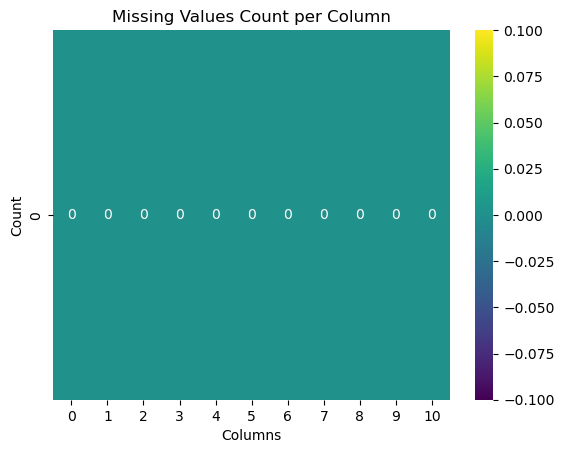

In [7]:
# Calculate the count of missing values in each column and convert it to a 2D array
missing_values_count = df.isna().sum().values.reshape(1, -1)

# Create a heatmap to visualize missing values count
sns.heatmap(missing_values_count, annot=True, cmap='viridis')
plt.title('Missing Values Count per Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Region', ylabel='count'>

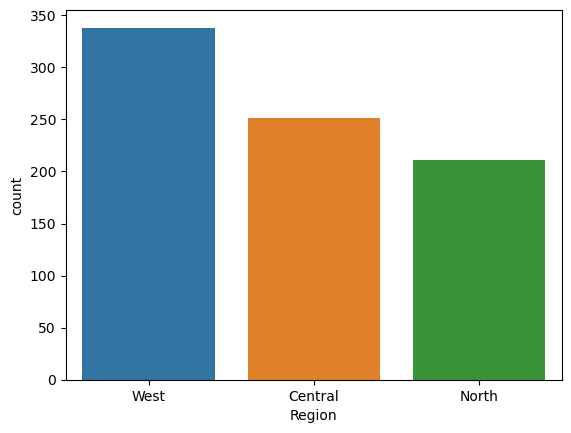

In [8]:
sns.countplot(x='Region', data=df)

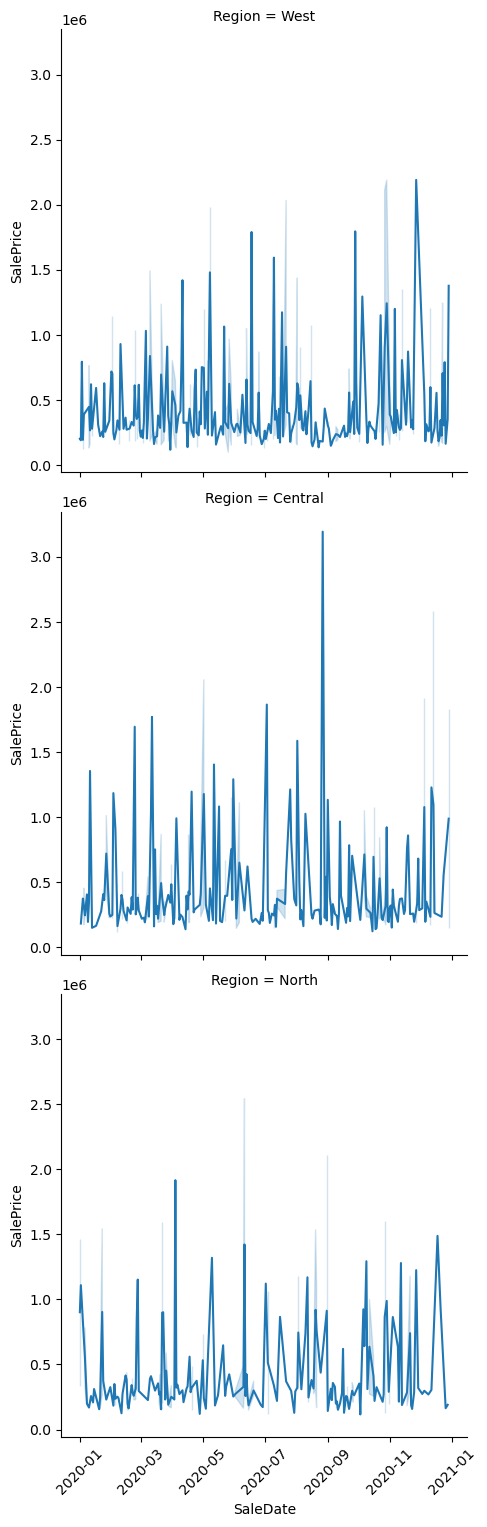

In [13]:
# create relplot facetplot object 
#sns.FacetGrid(df4, col='Geo-political zone', hue='Geo-political zone', col_wrap=3, )
seaborn_facetgrid_object = sns.relplot( 
    x='SaleDate',   
    col_wrap=1,
    y='SalePrice', 
    col='Region', 
    kind='line', 
    data=df
) 
plt.xticks(rotation=45)
# show plot 
seaborn_facetgrid_object 

In [19]:
def mean_pairwise(cat_var):
    mean_by = df.groupby(cat_var)['SalePrice'].mean()
    mean_by = pd.DataFrame(mean_by)
    mean_by = mean_by.sort_values(by=['SalePrice'], inplace=False, ascending=False)
    
    return mean_by

In [21]:
df_city = mean_pairwise('City')

<Figure size 3000x1600 with 0 Axes>

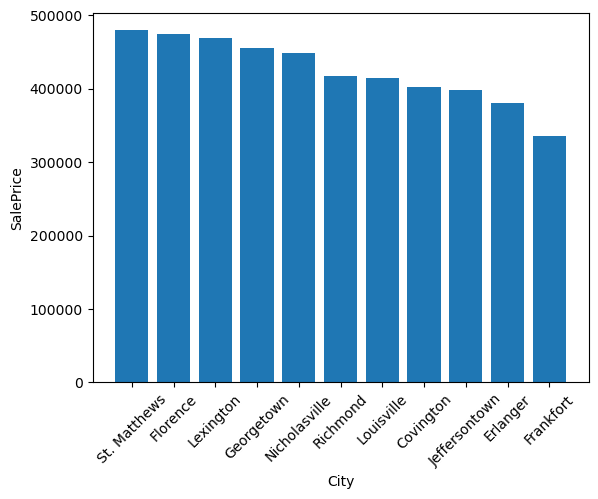

<Figure size 3000x1600 with 0 Axes>

In [22]:
plt.bar(df_city.index, df_city["SalePrice"])
plt.xlabel('City')
plt.ylabel('SalePrice')
#plt.title('')
plt.xticks(rotation=45)

plt.figure(figsize=(30,16))

In [23]:
df_agent = mean_pairwise('Agent')

In [26]:
df_agent

,SalePrice
Agent,
Ivan Cordova,528082.711655
Eliana Baker,491708.252364
Payton Evans,469027.992240
Tristan Blevins,450254.733104
Timothy Case,447834.370491
Evelyn Everett,439094.338633
Kaitlynn Oconnor,437013.940473
Judith Moreno,436335.538385
Priscilla Jackson,419860.432776


<Figure size 10000x5600 with 0 Axes>

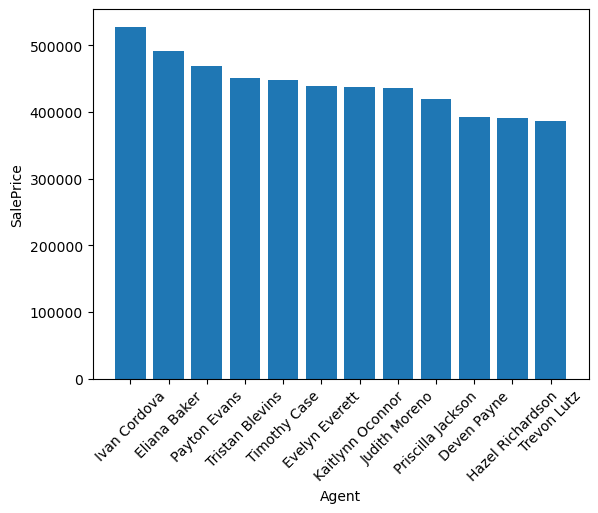

<Figure size 10000x5600 with 0 Axes>

In [28]:
plt.bar(df_agent.index, df_agent["SalePrice"])
plt.xlabel('Agent')
plt.ylabel('SalePrice')
#plt.title('')
plt.xticks(rotation=45)

plt.figure(figsize=(100,56))

In [29]:
import calendar

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

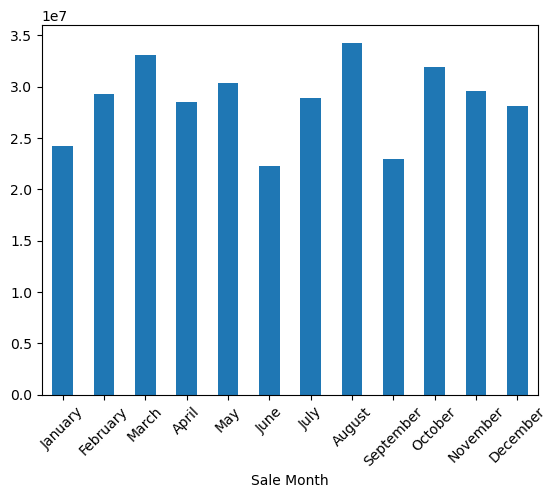

In [30]:
months = calendar.month_name[1:]
df["Sale Month"] = pd.Categorical(df["Sale Month"], 
                      categories = months, ordered=True)


# Sum the values by months and create a bar plot

df.groupby("Sale Month")["SalePrice"].sum().plot(kind="bar")
plt.xticks(rotation=45)

#### Plotting sales price against asking price

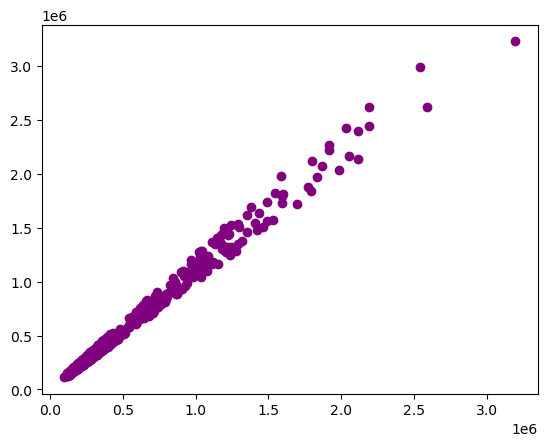

In [9]:
plt.scatter(df['SalePrice'], df['AskingPrice'], color="purple")

#### Plotting sales price against Square Footage

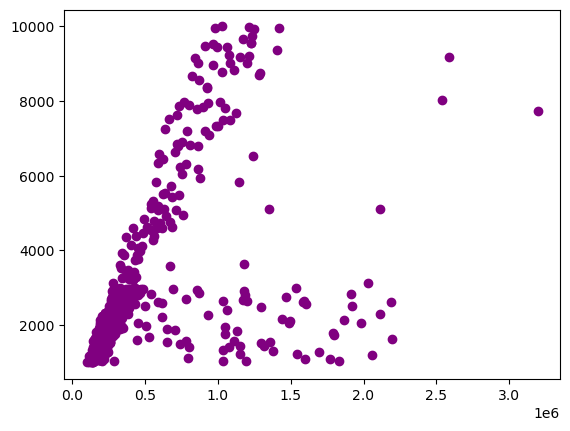

In [10]:
plt.scatter(df['SalePrice'], df['SquareFootage'], color="purple")

#### Plotting sales price against Acreage

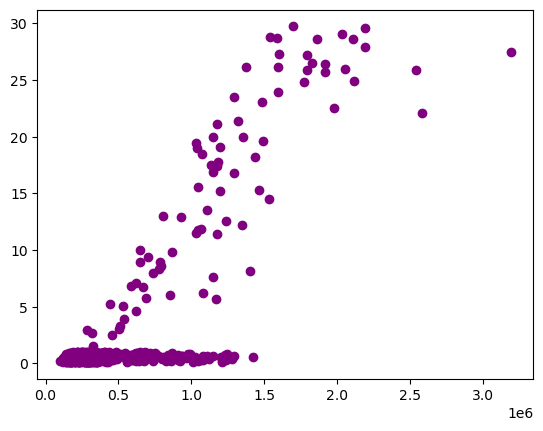

In [11]:
plt.scatter(df['SalePrice'], df['Acreage'], color="purple")

In [14]:
df

,Address,City,Region,SquareFootage,Big deals (>5000),Acreage,AskingPrice,SalePrice,SaleDate,Sale Month,Agent
0,Pearl Street,Louisville,West,1438,0,0.302,2.065195e+05,1.653395e+05,2020-02-09,February,Timothy Case
1,Hartford Road,Louisville,West,1116,0,0.843,2.044869e+05,1.701536e+05,2020-10-10,October,Timothy Case
2,Franklin Court,Richmond,Central,2471,0,0.328,3.859425e+05,3.672628e+05,2020-02-12,February,Timothy Case
3,Cypress Court,Louisville,West,2614,0,0.564,3.353113e+05,3.039262e+05,2020-02-23,February,Trevon Lutz
4,Mill Street,Lexington,Central,9355,1,8.163,1.540675e+06,1.405096e+06,2020-05-12,May,Tristan Blevins
...,...,...,...,...,...,...,...,...,...,...,...
795,Redwood Drive,Lexington,Central,2133,0,0.225,2.352132e+05,1.966853e+05,2020-11-25,November,Deven Payne
796,Marshall Street,Louisville,West,1590,0,0.264,1.985228e+05,1.683076e+05,2020-12-23,December,Priscilla Jackson
797,Grant Avenue,Nicholasville,Central,8826,1,0.700,1.363456e+06,1.110671e+06,2020-06-06,June,Deven Payne
798,Cardinal Drive,Jeffersontown,West,5494,1,0.484,7.212456e+05,6.215695e+05,2020-01-12,January,Timothy Case


## Data Cleaning

### Removing redundant/unneccessary columns

In [15]:
# List of columns to drop
columns_to_drop2 = ['Address', 'City', 'Region', 'SaleDate', 'Sale Month', 'Agent']

# Drop the columns
df_reg = df.drop(columns=columns_to_drop2)

In [16]:
df_reg

,SquareFootage,Big deals (>5000),Acreage,AskingPrice,SalePrice
0,1438,0,0.302,2.065195e+05,1.653395e+05
1,1116,0,0.843,2.044869e+05,1.701536e+05
2,2471,0,0.328,3.859425e+05,3.672628e+05
3,2614,0,0.564,3.353113e+05,3.039262e+05
4,9355,1,8.163,1.540675e+06,1.405096e+06
...,...,...,...,...,...
795,2133,0,0.225,2.352132e+05,1.966853e+05
796,1590,0,0.264,1.985228e+05,1.683076e+05
797,8826,1,0.700,1.363456e+06,1.110671e+06
798,5494,1,0.484,7.212456e+05,6.215695e+05


### Ploting the Correlation heatmap 

Text(0.5, 1.0, 'Correlation Heatmap')

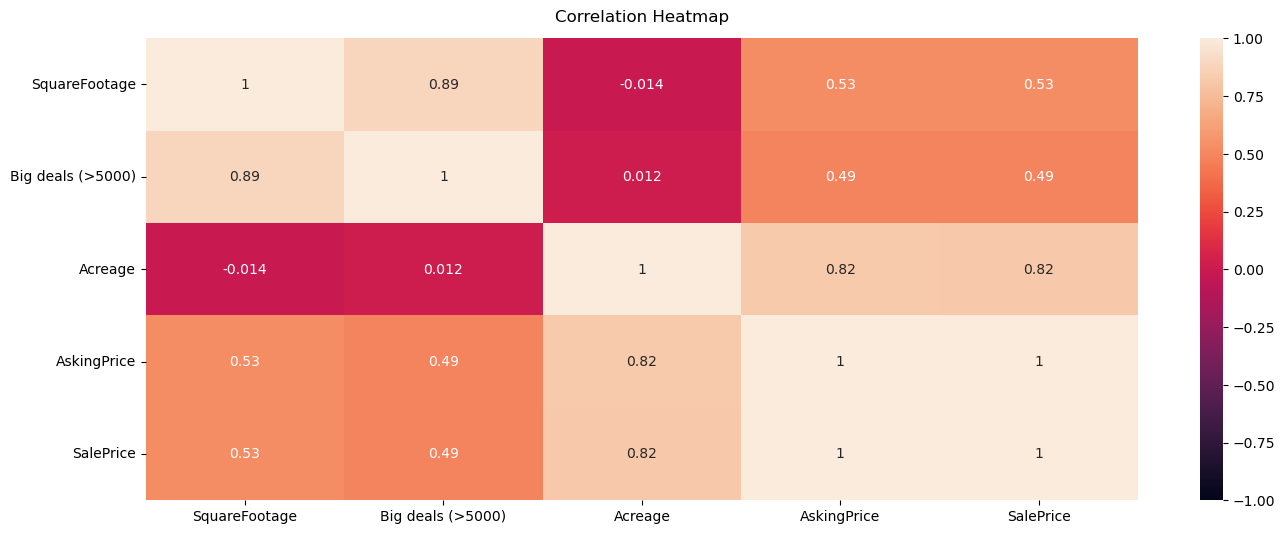

In [17]:

plt.figure(figsize=(16,6))

heatmap = sns.heatmap(df_reg.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [18]:
# List of columns to drop
columns_to_drop3 = ['AskingPrice']

# Drop the columns
df_reg = df_reg.drop(columns=columns_to_drop3)

### Checking for Null values

In [32]:
df_reg.isnull().sum()

SquareFootage        0
Big deals (>5000)    0
Acreage              0
SalePrice            0
dtype: int64

Text(0.5, 1.0, 'Correlation Heatmap')

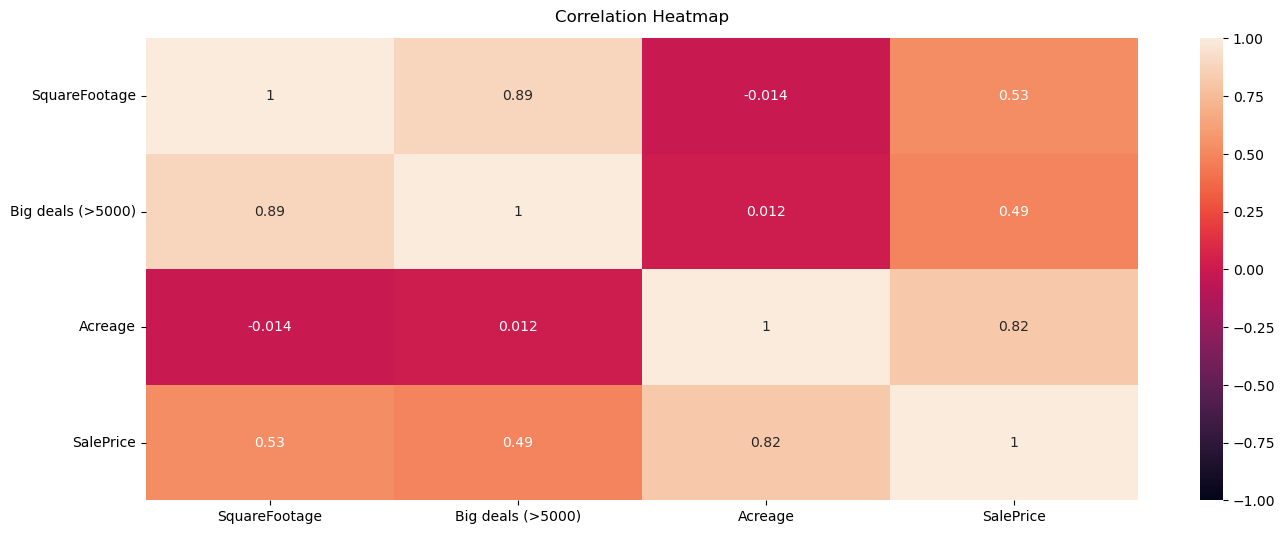

In [19]:
plt.figure(figsize=(16,6))

heatmap = sns.heatmap(df_reg.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### Predicting House Prices

In [22]:
X = df_reg.drop('SalePrice', axis = 1)

y = df_reg['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Creating a random forest model

In [60]:
rf = RandomForestRegressor(n_estimators=30)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)

rf_expected = y_test

df_rf_pred = pd.DataFrame({'Predicted':rf_predicted, 'Actual':rf_expected})
df_rf_pred

df_rf_pred['Accuracy'] = df_rf_pred['Actual'] - df_rf_pred['Predicted']

### Evaluating the model

In [61]:
print("MAPE: %r" % mape(rf_expected, rf_predicted))

MAPE: 0.13329187946712562


### Cross validating the Randomforest model

In [57]:
# Assuming you have your feature matrix X and target variable y
# ...

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create a Random Forest Regression model
model = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=10, scoring= 'r2')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.936103442567628


In [58]:
expected = y_test

df_pred = pd.DataFrame({'Predicted':y_pred, 'Actual':expected})
df_pred

df_pred['Accuracy'] = df_pred['Actual'] - df_pred['Predicted']


In [41]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae

In [59]:
print("MAPE: %r" % mape(expected, y_pred))

MAPE: 0.12783003733038384


#### We can note that the random forest regression model that was cross validated had an higher accuracy and less error(MAPE) that the one that wasn't cross validated

## Running a Linear regression Model

In [47]:
from sklearn.linear_model import LinearRegression

In [49]:
reg = LinearRegression()
fit = reg.fit(X_train, y_train)
predicted_lr = reg.predict(X_test)

expected_lr = y_test

df_pred = pd.DataFrame({'Predicted':predicted_lr, 'Actual':expected_lr})
df_pred

df_pred['Accuracy'] = df_pred['Actual'] - df_pred['Predicted']

In [51]:
df_pred

,Predicted,Actual,Accuracy
696,3.258364e+05,3.880700e+05,62233.593254
667,9.433018e+05,9.226640e+05,-20637.833142
63,1.442992e+05,1.447261e+05,426.857802
533,3.323829e+05,2.833506e+05,-49032.341874
66,3.063578e+05,2.748317e+05,-31526.118345
...,...,...,...
220,1.828439e+06,1.791433e+06,-37005.102585
450,1.871307e+05,2.308214e+05,43690.664404
380,3.441440e+05,3.189542e+05,-25189.848358
132,2.827228e+05,2.422386e+05,-40484.214772


In [50]:
print("MAPE: %r" % mape(expected_lr, predicted_lr))

MAPE: 0.12012775812898699
